NAME THUMMA MANOJNA REDDY    22WU0104134

**1.Experiment 1: Implementation of a single artificial neuron.
oWrite a program to simulate a single artificial neuron performing binary classification.
oInputs, weights, bias, and activation function.**

In [1]:
import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the artificial neuron
def single_neuron(inputs, weights, bias):
    # Calculate the weighted sum of inputs
    weighted_sum = np.dot(inputs, weights) + bias

    # Apply the sigmoid activation function
    output = sigmoid(weighted_sum)

    return output

# Inputs to the neuron
inputs = np.array([1, 0])  # Example inputs (can be changed)

# Weights for each input
weights = np.array([0.8, -0.5])  # Example weights (can be adjusted)

# Bias
bias = 0.2  # Example bias (can be adjusted)

# Perform binary classification
output = single_neuron(inputs, weights, bias)

# Classify based on a threshold (0.5)
classification = 1 if output >= 0.5 else 0

# Display the results
print("Inputs:", inputs)
print("Weights:", weights)
print("Bias:", bias)
print("Weighted sum:", np.dot(inputs, weights) + bias)
print("Output (after sigmoid):", output)
print("Binary Classification:", classification)


Inputs: [1 0]
Weights: [ 0.8 -0.5]
Bias: 0.2
Weighted sum: 1.0
Output (after sigmoid): 0.7310585786300049
Binary Classification: 1


**2.Experiment 2: Implementation of Single Layer Perceptron (SLP).
oTrain and test SLP on a linearly separable dataset (e.g., AND/OR gate).**

In [2]:
import numpy as np

# Step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Single-Layer Perceptron (SLP) class
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, inputs):
        # Compute weighted sum
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Apply step activation function
        return step_function(weighted_sum)

    def train(self, X, y):
        for epoch in range(self.epochs):
            print(f"Epoch {epoch + 1}/{self.epochs}")
            for inputs, target in zip(X, y):
                # Make prediction
                prediction = self.predict(inputs)
                # Compute error
                error = target - prediction
                # Update weights and bias
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
                print(f"  Inputs: {inputs}, Target: {target}, Prediction: {prediction}, Error: {error}")
            print(f"  Updated weights: {self.weights}, Updated bias: {self.bias}\n")

# Linearly separable dataset (AND gate)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 0, 0, 1])  # Outputs (AND gate)

# Initialize perceptron
perceptron = SingleLayerPerceptron(input_size=2, learning_rate=0.1, epochs=10)

# Train the perceptron
print("Training the perceptron on the AND gate dataset:\n")
perceptron.train(X, y)

# Test the perceptron
print("Testing the perceptron on the AND gate dataset:\n")
for inputs in X:
    prediction = perceptron.predict(inputs)
    print(f"  Inputs: {inputs}, Prediction: {prediction}")


Training the perceptron on the AND gate dataset:

Epoch 1/10
  Inputs: [0 0], Target: 0, Prediction: 1, Error: -1
  Inputs: [0 1], Target: 0, Prediction: 0, Error: 0
  Inputs: [1 0], Target: 0, Prediction: 0, Error: 0
  Inputs: [1 1], Target: 1, Prediction: 0, Error: 1
  Updated weights: [0.1 0.1], Updated bias: 0.0

Epoch 2/10
  Inputs: [0 0], Target: 0, Prediction: 1, Error: -1
  Inputs: [0 1], Target: 0, Prediction: 1, Error: -1
  Inputs: [1 0], Target: 0, Prediction: 0, Error: 0
  Inputs: [1 1], Target: 1, Prediction: 0, Error: 1
  Updated weights: [0.2 0.1], Updated bias: -0.1

Epoch 3/10
  Inputs: [0 0], Target: 0, Prediction: 0, Error: 0
  Inputs: [0 1], Target: 0, Prediction: 1, Error: -1
  Inputs: [1 0], Target: 0, Prediction: 1, Error: -1
  Inputs: [1 1], Target: 1, Prediction: 0, Error: 1
  Updated weights: [0.2 0.1], Updated bias: -0.20000000000000004

Epoch 4/10
  Inputs: [0 0], Target: 0, Prediction: 0, Error: 0
  Inputs: [0 1], Target: 0, Prediction: 0, Error: 0
  Inputs

**3.Experiment 3: Multi-Layer Perceptron (MLP) for XOR Gate.
oDesign and train MLP to solve the XOR problem.**

In [3]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Multi-Layer Perceptron (MLP) class
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, epochs=10000):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(input_size, hidden_size) - 0.5
        self.bias_hidden = np.random.rand(hidden_size) - 0.5
        self.weights_hidden_output = np.random.rand(hidden_size, output_size) - 0.5
        self.bias_output = np.random.rand(output_size) - 0.5
        self.learning_rate = learning_rate
        self.epochs = epochs

    def forward(self, inputs):
        # Forward pass
        self.hidden_input = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)

        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output_output = sigmoid(self.output_input)
        return self.output_output

    def backward(self, inputs, target_output, predicted_output):
        # Calculate output layer error and gradient
        output_error = target_output - predicted_output
        output_gradient = output_error * sigmoid_derivative(predicted_output)

        # Calculate hidden layer error and gradient
        hidden_error = np.dot(output_gradient, self.weights_hidden_output.T)
        hidden_gradient = hidden_error * sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_gradient) * self.learning_rate
        self.bias_output += np.sum(output_gradient, axis=0) * self.learning_rate

        self.weights_input_hidden += np.dot(inputs.T, hidden_gradient) * self.learning_rate
        self.bias_hidden += np.sum(hidden_gradient, axis=0) * self.learning_rate

    def train(self, X, y):
        for epoch in range(self.epochs):
            # Forward and backward pass
            predicted_output = self.forward(X)
            self.backward(X, y, predicted_output)
            if (epoch + 1) % 1000 == 0:
                loss = np.mean((y - predicted_output) ** 2)
                print(f"Epoch {epoch + 1}/{self.epochs}, Loss: {loss:.4f}")

    def predict(self, X):
        # Predict output for new inputs
        return self.forward(X)

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([[0], [1], [1], [0]])  # Outputs

# Initialize and train the MLP
mlp = MLP(input_size=2, hidden_size=2, output_size=1, learning_rate=0.1, epochs=10000)
print("Training the MLP on the XOR gate dataset...\n")
mlp.train(X, y)

# Test the MLP
print("\nTesting the MLP on the XOR gate dataset:")
for inputs in X:
    prediction = mlp.predict(inputs)
    print(f"Inputs: {inputs}, Predicted Output: {np.round(prediction[0])}, Actual Output: {int(y[np.where((X == inputs).all(axis=1))[0][0]])}")


Training the MLP on the XOR gate dataset...

Epoch 1000/10000, Loss: 0.2500
Epoch 2000/10000, Loss: 0.2500
Epoch 3000/10000, Loss: 0.2499
Epoch 4000/10000, Loss: 0.2498
Epoch 5000/10000, Loss: 0.2496
Epoch 6000/10000, Loss: 0.2484
Epoch 7000/10000, Loss: 0.2370
Epoch 8000/10000, Loss: 0.1895
Epoch 9000/10000, Loss: 0.0671
Epoch 10000/10000, Loss: 0.0177

Testing the MLP on the XOR gate dataset:
Inputs: [0 0], Predicted Output: 0.0, Actual Output: 0
Inputs: [0 1], Predicted Output: 1.0, Actual Output: 1
Inputs: [1 0], Predicted Output: 1.0, Actual Output: 1
Inputs: [1 1], Predicted Output: 0.0, Actual Output: 0


<ipython-input-3-e1fc2e6d5d3d>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Inputs: {inputs}, Predicted Output: {np.round(prediction[0])}, Actual Output: {int(y[np.where((X == inputs).all(axis=1))[0][0]])}")


**4.Experiment 4: Activation Functions.
oImplement Sigmoid, ReLU, and Tanh activation functions.
oCompare their outputs on a dataset.**

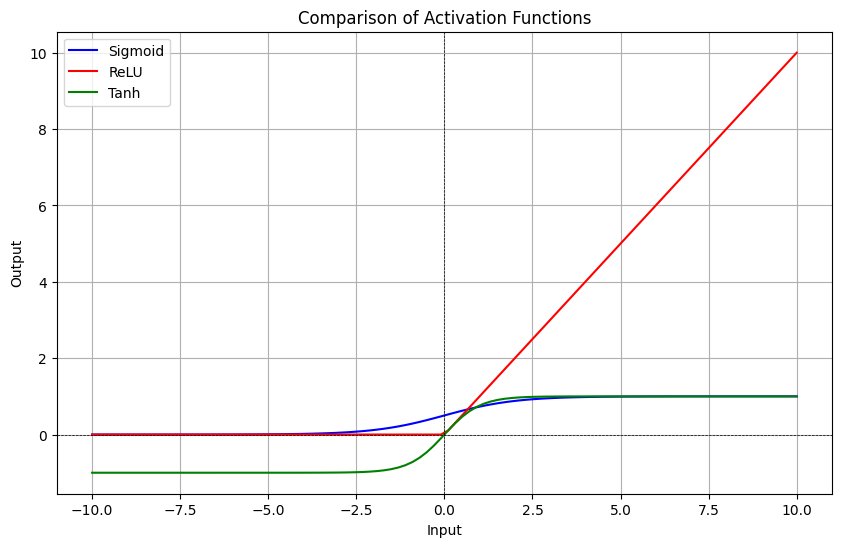

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Generate a dataset
x = np.linspace(-10, 10, 100)  # 100 points between -10 and 10

# Compute the outputs of each activation function
sigmoid_output = sigmoid(x)
relu_output = relu(x)
tanh_output = tanh(x)

# Plot the activation functions
plt.figure(figsize=(10, 6))

# Sigmoid
plt.plot(x, sigmoid_output, label="Sigmoid", color="blue")
# ReLU
plt.plot(x, relu_output, label="ReLU", color="red")
# Tanh
plt.plot(x, tanh_output, label="Tanh", color="green")

# Formatting the plot
plt.title("Comparison of Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(True)
plt.show()


**5.Experiment 5: Forward and Backpropagation.
oImplement forward propagation and backpropagation manually for a 2-layer neural network.**

In [6]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Mean Squared Error loss function and its derivative
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return -(y_true - y_pred)

# Initialize parameters
np.random.seed(42)
input_dim = 2
hidden_dim = 2
output_dim = 1

# Randomly initialize weights and biases
W1 = np.random.rand(input_dim, hidden_dim)
b1 = np.random.rand(hidden_dim)
W2 = np.random.rand(hidden_dim, output_dim)
b2 = np.random.rand(output_dim)

# Input data (X) and target output (y)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR inputs
y = np.array([[0], [1], [1], [0]])              # XOR outputs

# Learning rate
learning_rate = 0.1

# Forward propagation
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1      # Hidden layer linear combination
    A1 = sigmoid(Z1)            # Hidden layer activation
    Z2 = np.dot(A1, W2) + b2    # Output layer linear combination
    A2 = sigmoid(Z2)            # Output layer activation (prediction)
    return Z1, A1, Z2, A2

# Backpropagation
for epoch in range(10000):  # Train for 10000 epochs
    # Forward propagation
    Z1, A1, Z2, A2 = forward_propagation(X)

    # Compute loss
    loss = mse_loss(y, A2)

    # Backward propagation
    dA2 = mse_loss_derivative(y, A2) * sigmoid_derivative(Z2)  # Gradients for output layer
    dW2 = np.dot(A1.T, dA2)
    db2 = np.sum(dA2, axis=0)

    dA1 = np.dot(dA2, W2.T) * sigmoid_derivative(Z1)  # Gradients for hidden layer
    dW1 = np.dot(X.T, dA1)
    db1 = np.sum(dA1, axis=0)

    # Update weights and biases
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Final predictions
_, _, _, predictions = forward_propagation(X)
print("\nFinal Predictions:")
print(predictions)


Epoch 0, Loss: 0.3247
Epoch 1000, Loss: 0.2406
Epoch 2000, Loss: 0.1960
Epoch 3000, Loss: 0.1207
Epoch 4000, Loss: 0.0305
Epoch 5000, Loss: 0.0125
Epoch 6000, Loss: 0.0074
Epoch 7000, Loss: 0.0051
Epoch 8000, Loss: 0.0038
Epoch 9000, Loss: 0.0031

Final Predictions:
[[0.05321718]
 [0.95171956]
 [0.95160871]
 [0.05174923]]
